# PHAS0030 Assignment Week 8

In this notebook we will explore the Ising model with Monte Carlo a little furthee. In this we will swap two spins of a set of randomly initialised particles.

The Ising model is a model system for interacting spins on a lattice which assumes that a square lattice with spin $-1/2$ particles that interact only with their nearest neighbours, and potentially an external magnetic field.

The energy equation can then be written out as

$$
E = -\sum_{i,j}{J s_i s_j} - \sum_{i}{B m s_i}
$$

Using this equation combined with methods which we learnt in class, this notebook is going to be implementing a montecarlo simulation in order to see how the arrangement of spins and also the total energy of the system change over 50,000 timesteps. We will also be comparing $2$ simulations:

The first being where $\frac{J}{k_B T} = 0.5$ and the other being where $\frac{J}{k_B T} = 1$.

Where each timestep will be a point in time which we will swap 2 spins to see if the total energy increases or decreases. If it it decreases then we will allow the swap to happen and use the configuration for the next timestep. If the total energy increases then we will not allow the swap to go through unless our probability condition is satisfied.

In [1]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 1. Set up the initial arrangements of spins

In [2]:
# Defining global variables for our first simulation
boxlen = 50
B_over_kT = 0
J_over_kT = 0.5
spins = (-1)**np.random.randint(0,2,size=(boxlen,boxlen))

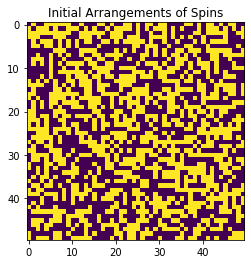

In [3]:
plt.imshow(spins)
plt.title("Initial Arrangements of Spins")
plt.show()

### 2. Calculate the energy

In [4]:
# Calculating total energy
sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
etot = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))

print("Starting energy is ",etot)

Starting energy is  80.0


### 3. Write the swap function



In [5]:
def update_swap(i1,j1,i2,j2):
    """
    In this function we use the input of the coordinates of the two spins we are
    swapping. With this information we then calculate how this will change the total
    energy of the system. If it it decreases then we will allow the swap to happen
    and use the configuration for the next timestep. If the total energy increases
    then we will not allow the swap to go through unless our probability condition is
    satisfied.
    
    Input:
    i1, j1 = Coordiantes of first spin  
    i2, j2 = Coordiantes of second spin
    
    Output:
    de = Change in energy
    """
    i1m1 = (i1-1)%boxlen
    i1p1 = (i1+1)%boxlen
    j1m1 = (j1-1)%boxlen
    j1p1 = (j1+1)%boxlen
    sum_neigh_spins1 = spins[i1m1,j1] + spins[i1p1,j1] + spins[i1,j1m1] + spins[i1,j1p1]
    
    i2m1 = (i2-1)%boxlen
    i2p1 = (i2+1)%boxlen
    j2m1 = (j2-1)%boxlen
    j2p1 = (j2+1)%boxlen
    sum_neigh_spins2 = spins[i2m1,j2] + spins[i2p1,j2] + spins[i2,j2m1] + spins[i2,j2p1]
    
    diff_spins = sum_neigh_spins1 - sum_neigh_spins2
    
    # The change in energy when both of our particles switch
    de = 2*(spins[i1,j1]*(J_over_kT*sum_neigh_spins1 + B_over_kT) + spins[i2,j2]*(J_over_kT*sum_neigh_spins2 + B_over_kT))
    
    # Our probability condition
    p = np.exp(-de)
    
    if de<0 or p > np.random.random():
        # Swapping spins
        spins[i1,j1] = spins[i2,j2]
    else:
        de = 0.0
    
    return de

### 4. Run the simulation

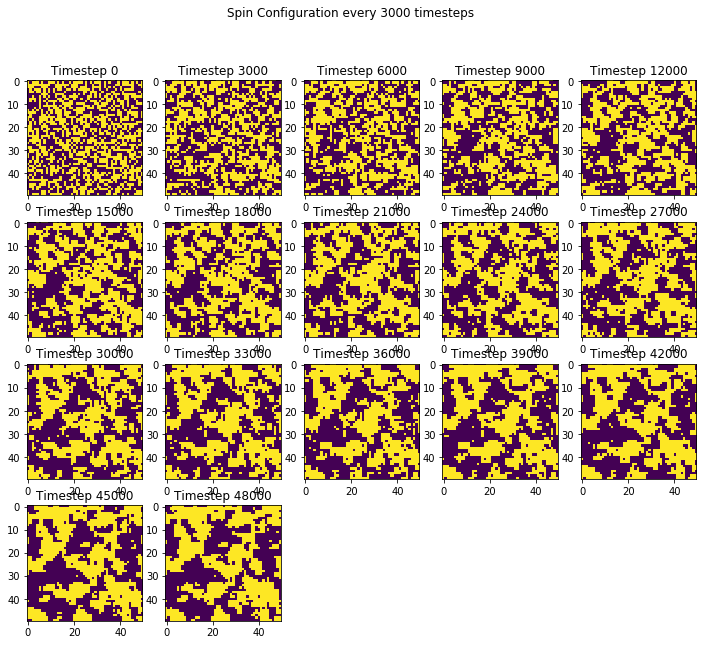

In [6]:
Nsteps = 50000 # Number of timesteps

etot = np.zeros(Nsteps+1) # Creating total energy array for each timestep

# Calculating total energy
sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
etot[0] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))

# Plotting configuration of spins
figIsing = plt.figure(figsize=(12,10))
figIsing.suptitle("Spin Configuration every 3000 timesteps")
index = 1

for i in range(Nsteps):
    # Select two points at random to test
    this_i1, this_j1 = np.random.randint(boxlen), np.random.randint(boxlen)
    this_i2, this_j2 = np.random.randint(boxlen), np.random.randint(boxlen)
    
    # Swaping random particles to see if total energy goes down
    de = update_swap(this_i1,this_j1,this_i2,this_j2)
    
    # Calculating total energy
    sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
    etot[i+1] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
    
    # Plotting spin configuration every 3000 timesteps
    if i%3000==0:
        ax = figIsing.add_subplot(4,5,index)
        ax.imshow(spins)
        ax.set_title("Timestep " + str(i))
        index +=1

### 5. Show total energy


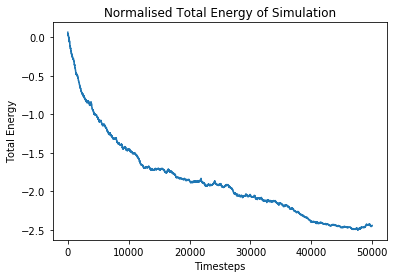

In [7]:
Nspins = boxlen*boxlen
etot_n = etot/(Nspins*J_over_kT) # Normalised

plt.plot(etot_n)
plt.xlabel("Timesteps")
plt.ylabel("Total Energy")
plt.title("Normalised Total Energy of Simulation")
plt.show()

### 6. Second Simulation

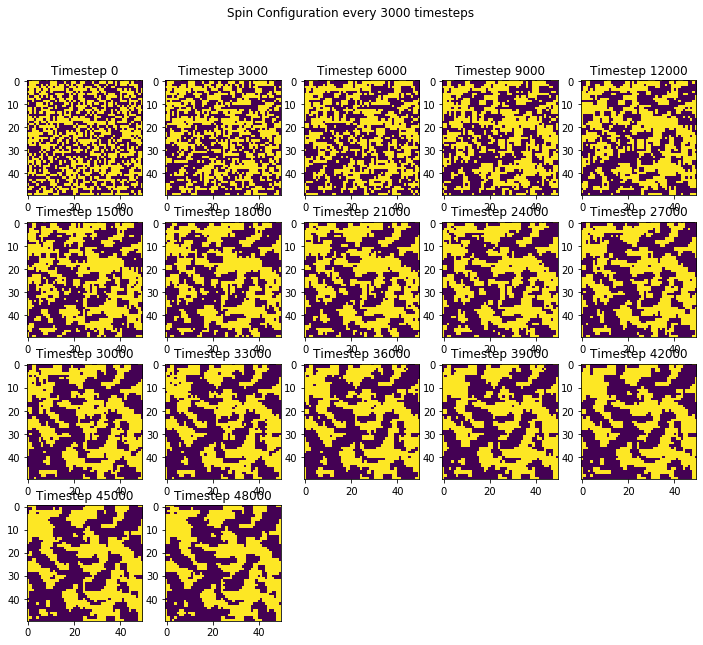

In [8]:
J_over_kT = 1
# Repeat simulation

# Initialising random spin configuration
spins = (-1)**np.random.randint(0,2,size=(boxlen,boxlen))

Nsteps = 50000 # Number of timesteps

etot = np.zeros(Nsteps+1) # Creating total energy array for each timestep

# Calculating total energy
sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
etot[0] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))

# Plotting configuration of spins
figIsing = plt.figure(figsize=(12,10))
figIsing.suptitle("Spin Configuration every 3000 timesteps")
index = 1

for i in range(Nsteps):
    # Select two points at random to test
    this_i1, this_j1 = np.random.randint(boxlen), np.random.randint(boxlen)
    this_i2, this_j2 = np.random.randint(boxlen), np.random.randint(boxlen)
    
    # Swaping random particles to see if total energy goes down
    de = update_swap(this_i1,this_j1,this_i2,this_j2)
    
    # Calculating total energy
    sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
    etot[i+1] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
    
    # Plotting spin configuration every 3000 timesteps
    if i%3000==0:
        ax = figIsing.add_subplot(4,5,index)
        ax.imshow(spins)
        ax.set_title("Timestep " + str(i))
        index +=1

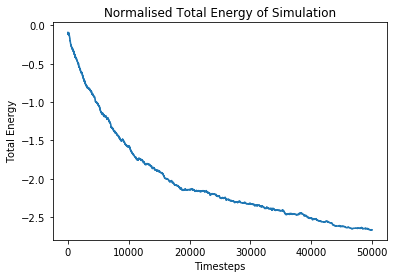

In [9]:
Nspins = boxlen*boxlen
etot_n = etot/(Nspins*J_over_kT) # Normalised

plt.plot(etot_n)
plt.xlabel("Timesteps")
plt.ylabel("Total Energy")
plt.title("Normalised Total Energy of Simulation")
plt.show()

## Conclusion


As we can see in the cells above, both our simulations seem to have produced quite nice results. Comparing the results from both it seems that out spin configuration progression is roughly the same and has no obvious differences from our plots. Although the total energy in the first simulation seems to have more noise in the decline of the total energy. They seem to both go down and start to flatten at the same total energy levels.